In [295]:
cd

/Users/joaobecker


#  ***Bank Marketing Campaign - Exploratory Data Analysis*** 
    
- In this part of the project, I will explore a Portuguese bank marketing campaign dataset with visualization techniques. The visualization techniques will help define the variables that are going to be used in the machine learning section. 

## Marketing Campaign Recap:

-  The marketing campaign goal is to sell long-term deposits through telemarketing phone calls. The bank agents execute phone calls to a list of clients to see if they are interested in subscribing for a long-term deposit. The result is a binary answer, 'yes' or 'no.'
    
## The Dataset:

-  The dataset is composed of 21 variables. There are 20 independent variables, ranging from numeric to categorical, such as job, marital status, month, amount of times the client was contacted, age and others. And 1 binary dependent variable, if client subscribed 'yes' or 'no'.


## Findings:

 - The exploration analysis was able to identify  variables that have a meaningful impact in a client subscribing to a long-term deposit. These variables are: job category, type of contact, level of education, the month of the year, call duration, number of calls made, if they have previously subscribed to a campaign, if they have previously subscribed to a campaign, quarterly interest rate and quarterly number of employed.
    
    1. Job category - The categories with the highest subscribed rate were students (31%), retired (25%) and unemployed (14%). An interesting fact is that these are the categories of people that do not have a job.
    
    2. Type of contact - The most effective way to contact someone is definetely to their cellular rather than their telephone. The cellular total subscribed rate was 14.7%, while on telephone was only 5.2%. In addition, 83% of all subscribers came from calls on their cellular.
    
    3. Level of education - Most of the subscribers had at least a univerisity degree, and the total subscribed rate for those with university degree was 13.7%. Interestingly,the subscribed rate for illiterate people was an astonishingly 22%. However, it is not very significant as the sample size is very small, with a total of only 4 people subscribing. 
    
    4. Month of the year - It was interesting to notice that some months had over 50% subscription rate, such as March, December and September. Also, May, the month with the highest amount of subscribers, had the worst subscription rate with only 6.4% subscribing to a long-term deposit.
    
    5. Call Duration - The duration of the call has a significant impact on subscribing a client. Most of the calls that didn't end up in subscription last at most 279 seconds, while the lower quartile of the calls that got people subscribed was 253 seconds. Therefore, the longer the agent stayed on the call with the client, the higher the chance on subscribing to a long-term deposit.
    
    6. Number of calls - Most clients subscribed with 2 calls or less, meaning that insisting on a client that has already said no, is a waste of time for the sales agents.
    
    7. Number of days passed by since last contact - 79.1% of the clients that have subscribed were never contacted by the bank. However, if they were previously contacted by the bank, the ideal time to contact is after 3 to 6 days, anything before or after that the probability is very low. 
    
    8. If a client previously subscribed to a bank campaign - If a client previously subscribed to a campaign from this bank, there is a high chance of them subscribing again. 65% of those who have subscribed to a previous campaign, subscribed to the long-term deposit.
    
    9. Interest rate (Daily indicator) - There is a significant correlation that the lower the interbank interest rate is, the more subscribers. The reason why people subscribe during a lower interest rate might be because they want to take advantage of the long-term high-interest rate, while all the other banks are offering low-interest rate on their money.
    
    10. Number of employed (Quarterly indicator) - The fewer people employed in the economy, the more subscribers. Similar to what job category shows, the people that are most likely to subscribed are the people without a job. Thus, a higher number of unemployed people, the higher the subscribed rate.

- Given the findings above, the next step is to use machine learning to identify how strong these correlations are and predict what clients are going to subscribe.


## Machine Learning
- This project makes use of three different machine learning models to predict what type of people are more likely to subscribe to a deposit at the Portuguese bank, the models are Logistic Regression, Random Forest and Gradient Boosting. Also, for each model we compare the difference between balanced and non-balanced data, to account for the imbalanced dataset.
    - The dataset is imbalanced as the subscribed category represents only 11% of the entries. 
    
### Models
 - To evaluate the best model for this marketing campaign, we will focus on three metrics: non-subscriber precision rate, subscriber recall rate and AUC.
     - Why are we focusing on these metrics?
         - The value of each customer is high for the bank, which means that the most important thing for the bank is to make sure that we can predict most of the people that are going to subscribe, even if it comes at a higher cost (lower AUC).
         
##### Logistic Regression         
- Unbalanced - The model obtained a high AUC of 93.28%, a high non-subscribe precision rate of 93%, but only a 41% subscriber recall rate.
- Balanced - After balancing our data we obtained an even better AUC of 93.6 %, a  non-subscriber precision rate of 98% and a subscriber recall rate of 89%.

- Interesting observation - After balancing the data and running a grid search on the model to evaluate the best parameters, we changed from using l1 regularization to l2 regularization.


##### Random Forest
- Unbalanced - The model obtained a high AUC of 91.8%, a non-subscriber precision rate of 90% and only a 15% subscriber recall rate.
- Balanced - After balancing our date we obtained a higher AUC of 93.06%, a high non-subscriber rate of 99% and an amazing subscriber recall rate of 95%.


##### Gradient Boosting Classifier
- Unbalanced - The model obtained a high AUC of 95%, a high non-subscriber precision rate of 94%, but only a 53% subscriber recall rate.
- Balanced - After balancing the data, the AUC slightly decreased to 93%, the non-subscriber precision rate remained the same at 94%,  and subscriber recall rate went up to 56%.
- Interesting observation - With the other two models, Logistic Regression and Random Forest, we were able to balance the data with the parameter class_weight. Since Gradient Boosting does not offer this feature, we balanced the data using the SMOTE function.

#### Best Model:
- The Gradient Boosting Classifier obtained the highest AUC value but performed poorly in predicting the actual subscribers. Logistic Regression and Random Forest performed similarly, but Random Forest performed better at the most important metrics, non-subscriber precision rate and subscriber recall rate, all at only a slight decrease in AUC.


## Conclusion

-  The best model for this dataset is the Random Forest Classification. The model has an accuracy of 99% when it predicts someone is not going to subscribe and can predict 95% of all the subscribers. By applying this model to the next campaign, the bank will increase efficiency, effectivity and the number of subscribers. The bank will improve efficiency and effectivity as it will need to contact only 30% of the entire list to obtain the same amount of subscribers, freeing 2068.5 hours from the sales department, saving the bank 28,339 Euros. In addition, the bank can increase the number of subscribers by creating a more enticing marketing campaign to those who are less likely not to subscribe. 



    
## The Experiments and the Data:


### Importing Libraries

In [296]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
sns.set()

### Converting the dataset from CSV to Dataframe, using pandas.

In [297]:
bank = pd.read_csv('Desktop/Data Science - Springboard/Capstone Project - 1/portuguese_bank_project/bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Analyzing data types

In [298]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Convert data types for easier data manipulation
1. Convert all the numeric columns to integers
2. Convert string columns into categorical columns

In [299]:
bank_int = bank[['age','campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

for i in bank_int:
    bank[i] = pd.to_numeric(bank[i])

In [300]:
bank_category = bank[['job', 'marital', 'education', 'contact', 'month', 'day_of_week']]

for i in bank_category:
    bank[i] = bank_category[i].astype('category')

### Function and data samples used in the project
- A function was created to facilitate the exploration analysis.
    1. percentage() - The goal of this function is to get the percentage of a value in a data sample against the 
        value in the dataset. 
- Two data samples were created to distinguish the binary output in the dependent variable:
    - bank_y - It's a data sample containing only those who have subscribed to the program.
    - bank_n - It's a data sample containging only those who didn't subscribed to the program.

In [301]:
# Function
def percentage(df_sample, variable, df):
    """" The goal of this funcion is to return the percentage of a specific variable (variable) 
    in a data sample (df_sample), against the same variable in the population data set (df).
    """
    return df_sample[variable].value_counts() / df[variable].value_counts() * 100


In [302]:
# Data samples

bank_y = bank[bank.y == 'yes']  # Subscribed to the campaign\n",
bank_n = bank[bank.y == 'no']   # Didn't subscribe to the campaign

## ***Exploring categorical variables***


### Job category over subscribing
- Most people that have subscribed to the program have an admin job. 
- However, an interesting finding is that the job categories that are most likely to subscribe to the program
    are student, retired and unemployed. Thus, this data shows that there might be a correlation with those that 
    are not working with subscribing to the program.

In [303]:
bank_y.job.value_counts(normalize=True)

admin.           0.291379
technician       0.157328
blue-collar      0.137500
retired          0.093534
management       0.070690
services         0.069612
student          0.059267
self-employed    0.032112
unemployed       0.031034
entrepreneur     0.026724
housemaid        0.022845
unknown          0.007974
Name: job, dtype: float64

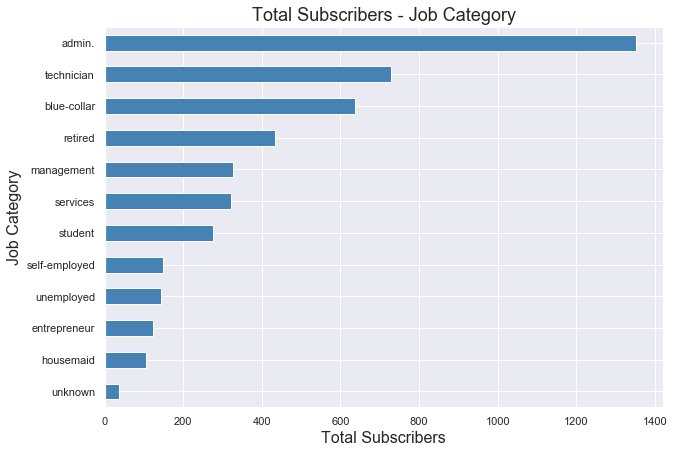

In [304]:
plt.figure(figsize=(10, 7))
bank_y.job.value_counts(ascending=True).plot(kind='barh', color='steelblue')
plt.ylabel('Job Category', fontsize=16)
plt.xlabel('Total Subscribers', fontsize=16)
plt.title('Total Subscribers - Job Category', fontsize=18)
plt.show()

In [305]:
pct_job = percentage(bank_y, 'job', bank).sort_values(ascending=False)
pct_job

student          31.428571
retired          25.232558
unemployed       14.201183
admin.           12.972558
management       11.217510
unknown          11.212121
technician       10.826042
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.138070
blue-collar       6.894316
Name: job, dtype: float64

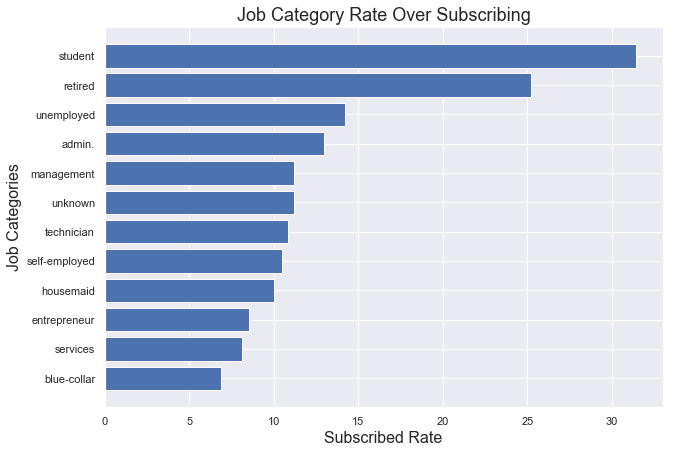

In [306]:
plt.figure(figsize=(10, 7))
plt.barh(pct_job.index, pct_job.values)
plt.xlabel('Subscribed Rate', fontsize=16)
plt.ylabel('Job Categories', fontsize=16)
plt.title('Job Category Rate Over Subscribing', fontsize=18)
plt.gca().invert_yaxis()
plt.show()

### Level of education over subscribing
- Most people that subscribed have a university degree.
- However, when comparing against the whole data set, Illiterate has the highest subscribing percentage, 
    with 22% subscribing to the program. While university degree has a 13% subscription rate. 

In [307]:
bank_y.education.value_counts()

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

In [310]:
percentage(bank_y, 'education', bank).sort_values(ascending=False)

illiterate             22.222222
unknown                14.500289
university.degree      13.724523
professional.course    11.348465
high.school            10.835523
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
Name: education, dtype: float64

### Type of contact over subscribing
- 83% of the subscription were obtained by calling to client's cellular phones
    - Calls to cellular have a total subscription rate of 14% while telephone has only 5%. 

In [15]:
bank_y.contact.value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [16]:
bank_y.contact.value_counts(normalize=True) * 100

cellular     83.038793
telephone    16.961207
Name: contact, dtype: float64

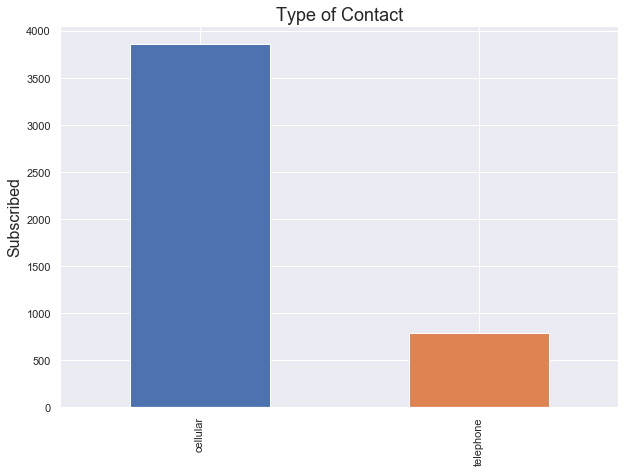

In [17]:
plt.figure(figsize=(10, 7))
bank_y.contact.value_counts().plot(kind='bar')
plt.ylabel('Subscribed', fontsize=16)
plt.title('Type of Contact', fontsize=18)
plt.show()

In [18]:
percentage(bank_y, 'contact', bank)

cellular     14.737607
telephone     5.231321
Name: contact, dtype: float64

### Month of the year over subscribing
- May was the month with the most subscription. However it was also the month with the lowest subscription 
    rate, with only 6% subscribing.
- The months with the best subscription rate were March, September, October and December. These months 
    had a success rate of near 50%!

In [19]:
total_month = bank_y.month.value_counts(normalize=True) * 100
total_month

may    19.094828
aug    14.116379
jul    13.987069
jun    12.047414
apr    11.616379
nov     8.965517
oct     6.788793
mar     5.948276
sep     5.517241
dec     1.918103
Name: month, dtype: float64

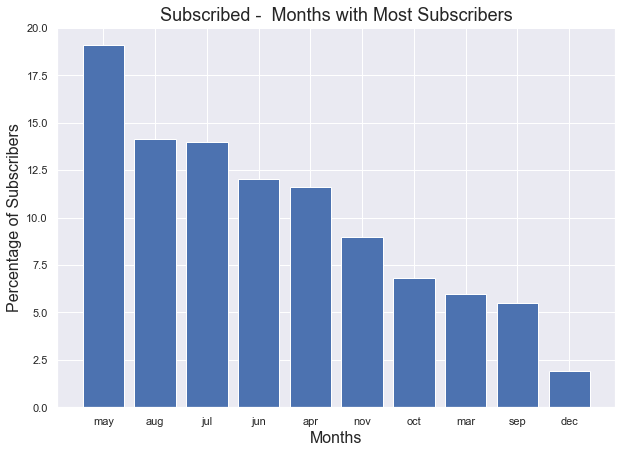

In [20]:
plt.figure(figsize=(10, 7))
plt.bar(total_month.index, total_month.values)
plt.title('Subscribed -  Months with Most Subscribers', fontsize=18)
plt.ylabel('Percentage of Subscribers', fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.show()

In [21]:
pct_month = percentage(bank_y, 'month', bank).sort_values(ascending=False)
pct_month

mar    50.549451
dec    48.901099
sep    44.912281
oct    43.871866
apr    20.478723
aug    10.602137
jun    10.511470
nov    10.143867
jul     9.046557
may     6.434745
Name: month, dtype: float64

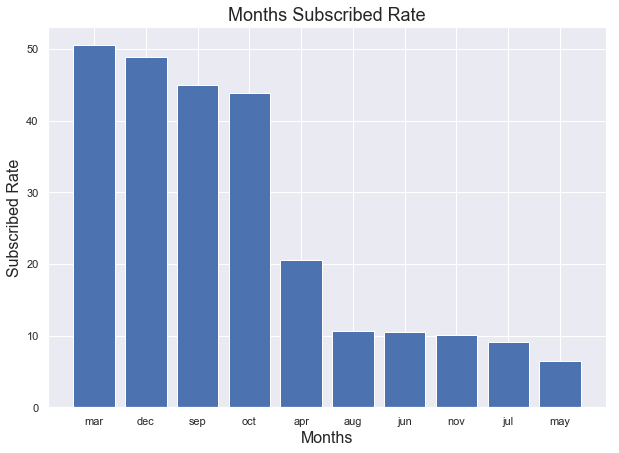

In [22]:
plt.figure(figsize=(10, 7))
plt.bar(pct_month.index, pct_month.values)
plt.title('Months Subscribed Rate', fontsize=18)
plt.ylabel('Subscribed Rate', fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.show()

### Day of the week over subscribing
- The data for the day of the week is well distributed, not showing any significant impact on subscription.

In [23]:
bank_y.day_of_week.value_counts()

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

In [24]:
percentage(bank_y, 'day_of_week', bank)

fri    10.808739
mon     9.948320
thu    12.118752
tue    11.779975
wed    11.667076
Name: day_of_week, dtype: float64

## ***Exploring Numeric variables***

### Client's age over subscribing
- Most subscribers are around 30 years old. 
- However, when comparing the subscribed data sample with the dataset, age doesn't seem to have a 
    significant impact.

In [25]:
age_y = bank_y.age.value_counts()
age_y = age_y.sort_index()

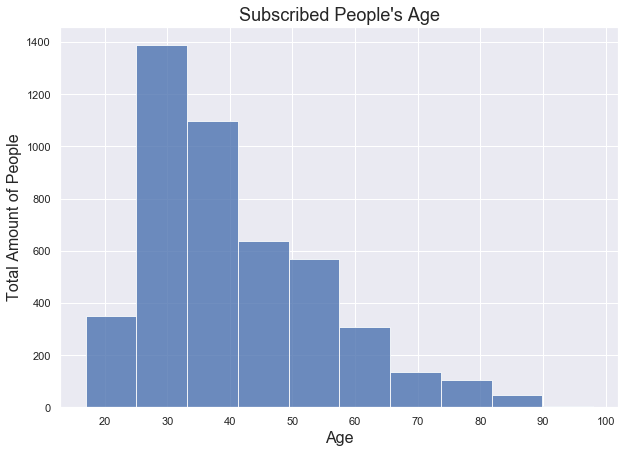

In [26]:
plt.figure(figsize=(10, 7))
bank_y.age.hist(alpha=0.8)
#plt.grid(False)
plt.title('Subscribed People\'s Age', fontsize=18)
plt.ylabel('Total Amount of People', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.show()

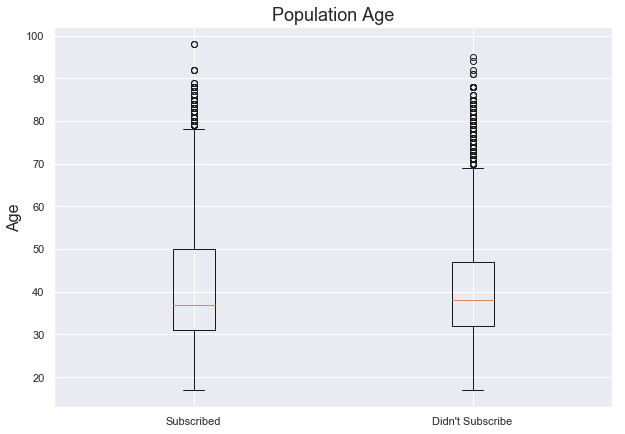

In [27]:
age_bank_comp = [bank_y.age, bank_n.age]

plt.figure(figsize=(10, 7))
plt.boxplot(age_bank_comp)
plt.title('Population Age', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Age', fontsize=16)
plt.show()

In [28]:
print('Age Subscribed')
print(bank_y.age.describe())

Age Subscribed
count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64


In [29]:
print('Age Didn\'t Subscribe')
print(bank_n.age.describe())

Age Didn't Subscribe
count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64


### Call duration over subscribing
- There seems to be a high correlation with longer calls and of client subscribing. 
- The median duration of calls in the subscribed data sample is of 449 seconds, while the median in the 
    dataset is only 163, which is the less than the lower quartile of subscribed data sample.

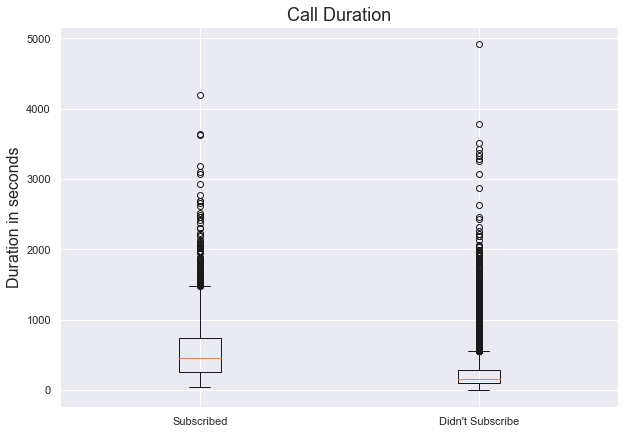

In [30]:
duration_comp = [bank_y.duration, bank_n.duration]
plt.figure(figsize=(10, 7))
plt.boxplot(duration_comp)
plt.title('Call Duration', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Duration in seconds', fontsize=16)
plt.show()

In [31]:
print('Duration Subscribed')
print(bank_y.duration.describe())

Duration Subscribed
count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64


In [32]:
print('Duration Didn\'t Subscribe')
print(bank_n.duration.describe())

Duration Didn't Subscribe
count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64


### Number of calls over subscribing
- Most clients subscribed with less than 2 calls. 
    - With the scatterplot we can see that the amount of subscribers decline significantly when more 
        than 2 calls were made.

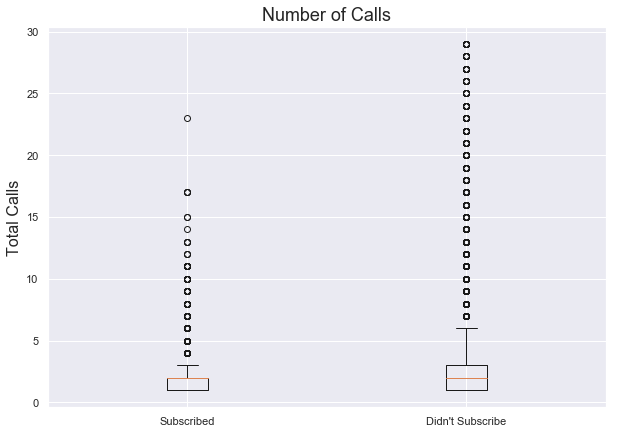

In [33]:
number_calls = [bank_y.campaign, bank_n.campaign[bank_n.campaign < 30]]
plt.figure(figsize=(10, 7))
plt.boxplot(number_calls)
plt.title('Number of Calls', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Total Calls', fontsize=16)
plt.show()

In [34]:
print('Number of Calls Subscribed')
print(bank_y.campaign.describe())

Number of Calls Subscribed
count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64


In [35]:
print('Number of Calls Didn\'t Subscribe')
print(bank_n.campaign.describe())

Number of Calls Didn't Subscribe
count    36548.000000
mean         2.633085
std          2.873438
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


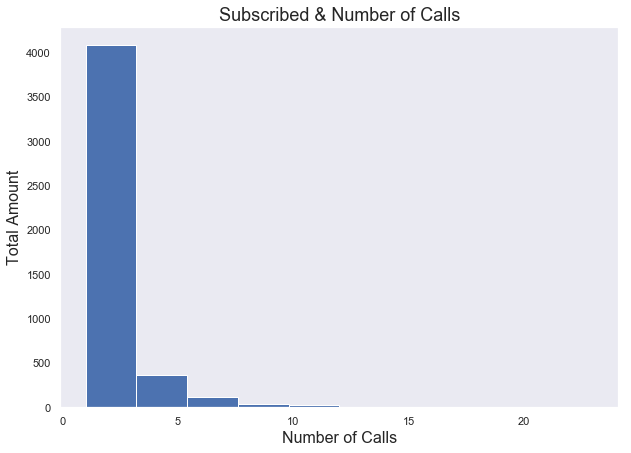

In [36]:
plt.figure(figsize=(10, 7))
bank_y.campaign.hist(grid=False)
plt.title('Subscribed & Number of Calls', fontsize=18)
plt.xlabel('Number of Calls', fontsize=16)
plt.ylabel('Total Amount', fontsize=16)
plt.show()

### Number of days passed by after client was last contact over subscribing
- Most of the clients who have signed up were not contacted previously.
    - 999 means that they were not contacted previously by the bank.
- If the client has been contacted by the bank previously, the ideal time to contact a client is after 3-6 
    from the last campaign.
    - Contacting a lead 1 day after, seems to decrease chance of subscribing

In [37]:
bank_y.pdays.value_counts(normalize=True).head(10)*100

999    79.159483
3       6.422414
6       6.228448
4       1.357759
7       0.862069
2       0.797414
9       0.754310
10      0.646552
5       0.625000
13      0.603448
Name: pdays, dtype: float64

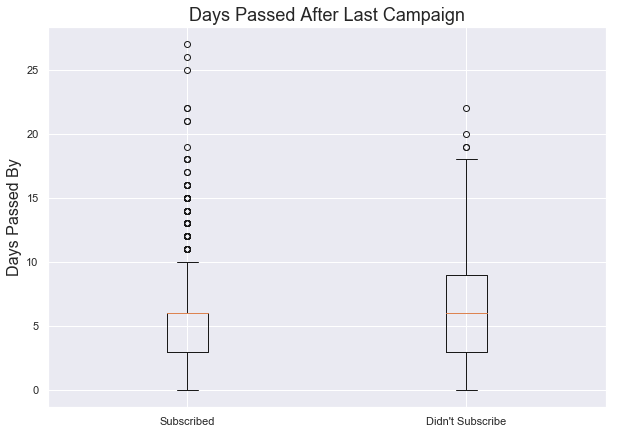

In [38]:
pdays_comp = [bank_y.pdays[bank_y.pdays != 999], bank_n.pdays[bank_n.pdays != 999]]
plt.figure(figsize=(10, 7))
plt.boxplot(pdays_comp)
plt.title('Days Passed After Last Campaign', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Days Passed By', fontsize=16)
plt.show()

In [39]:
print('Days passed after last campaign Subscribed')
print(bank_y.pdays[bank_y.pdays != 999].describe())

Days passed after last campaign Subscribed
count    967.000000
mean       5.913133
std        3.727896
min        0.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       27.000000
Name: pdays, dtype: float64


In [40]:
print('Days passed after last campaign Didn\'t Subscribe')
print(bank_n.pdays[bank_n.pdays != 999].describe())

Days passed after last campaign Didn't Subscribe
count    548.000000
mean       6.193431
std        3.987525
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       22.000000
Name: pdays, dtype: float64


### If client has previously subscribed to a campaign over subscribing (current campaign)
- Most of the signups came from those who were not offered anything previously.
- 65% of the clients that have previously subscribed to a campaign have enrolled in the current campaign.

In [41]:
bank_y.poutcome.value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [42]:
prev_sub = percentage(bank_y, 'poutcome', bank)
prev_sub

failure        14.228598
nonexistent     8.832213
success        65.112891
Name: poutcome, dtype: float64

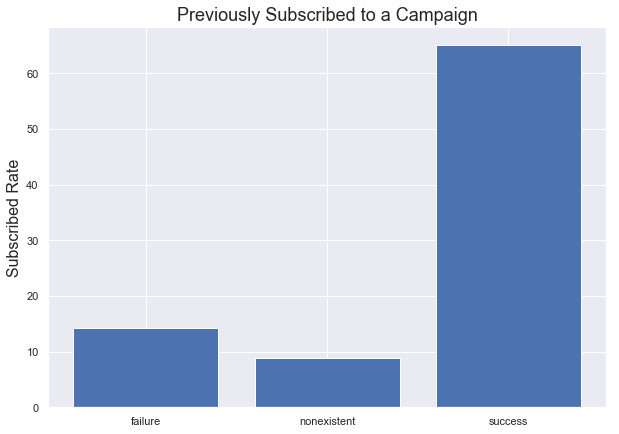

In [43]:
plt.figure(figsize=(10,7))
plt.bar(prev_sub.index, prev_sub.values)
plt.ylabel("Subscribed Rate", fontsize=16)
plt.title("Previously Subscribed to a Campaign", fontsize=18)
plt.show()

## ***Exploring Economic Indicator Variables***

### Interest rate (Daily Indicator) over subscribing
- There boxplot shows that there were more subscribers when interest rates were low.
- Since the program is offering 'attractive interest rates' as you deposit money into the bank, it 
    makes sense the lower the interest rate of the Central Bank the more appealing the interest bank 
    from the bank will be.

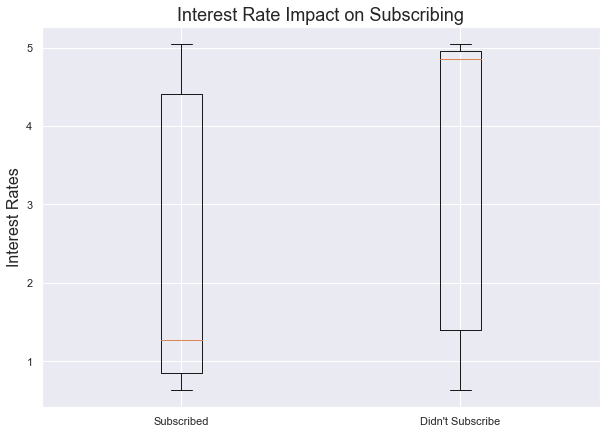

In [44]:
int_rate_comp = [bank_y['euribor3m'], bank_n['euribor3m']]

plt.figure(figsize=(10, 7))
plt.boxplot(int_rate_comp)
plt.title('Interest Rate Impact on Subscribing', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Interest Rates', fontsize=16)
plt.show()

In [45]:
print('Euribor Interbank Rate (Interest Rate) Subscribed')
print(bank_y['euribor3m'].describe())

Euribor Interbank Rate (Interest Rate) Subscribed
count    4640.000000
mean        2.123135
std         1.742598
min         0.634000
25%         0.849000
50%         1.266000
75%         4.406000
max         5.045000
Name: euribor3m, dtype: float64


In [46]:
print('Euribor Interbank Rate (Interest Rate) Didn\'t Subscribe')
print(bank_n['euribor3m'].describe())

Euribor Interbank Rate (Interest Rate) Didn't Subscribe
count    36548.000000
mean         3.811491
std          1.638187
min          0.634000
25%          1.405000
50%          4.857000
75%          4.962000
max          5.045000
Name: euribor3m, dtype: float64


### Employment  number (Quaterly Indicator) over subscribing
- The lower the employment number is, the more subscribers.

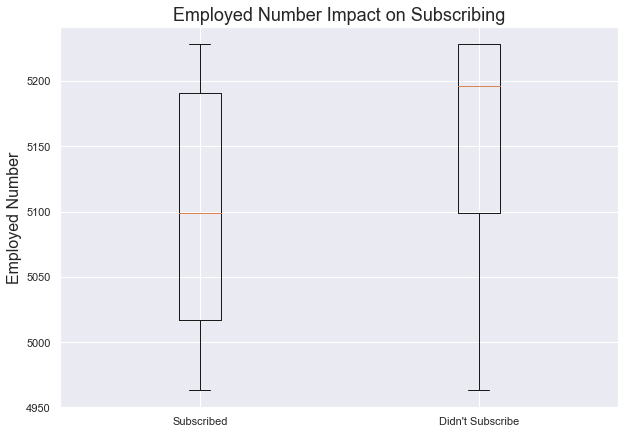

In [47]:
employed_comp = [bank_y['nr.employed'], bank_n['nr.employed']]
plt.figure(figsize=(10, 7))
plt.boxplot(employed_comp)
plt.title('Employed Number Impact on Subscribing', fontsize=18)
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Employed Number', fontsize=16)
plt.show()

In [48]:
print('Employment Number Subscribed')
print(bank_y['nr.employed'].describe())

Employment Number Subscribed
count    4640.000000
mean     5095.115991
std        87.572641
min      4963.600000
25%      5017.500000
50%      5099.100000
75%      5191.000000
max      5228.100000
Name: nr.employed, dtype: float64


In [49]:
print('Employment Number Didn\'t Subscribe')
print(bank_n['nr.employed'].describe())

Employment Number Didn't Subscribe
count    36548.000000
mean      5176.166600
std         64.571979
min       4963.600000
25%       5099.100000
50%       5195.800000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


### Best & Worst Months Over Economic Indicators

- To explore the economic indicator variables against months, I will build a new dataset with the variable month as datetime. By making month as datetime, it will be possible to analyze the variation of these economic indicators throughout time with a time series analysis plot. 
    - To build the time series analysis, I will use groupby on the month variable and get the average economic indicator for each month. 
        - Because of the outliers in each month, I chose to get the average of the economic indicators with the median.


- Finally, I will compare the time series analysis with the subscribed rate of each month by displaying both graphs side by side.


- Ps - I will be using the term best and worst months to describe the months that subscribed the most amount of clients and the least amount of clients, respectively.


In [50]:
# Time Series Analysis


bank_date = bank.copy()
bank_date_y = bank_y.copy()

# List of months   
months = bank_y['month'].unique()

# Replace the month column from string to integer
i = 0
for z in months:
    month_number = datetime.datetime.strptime(z, '%b').month
    bank_date['month'] = bank_date.month.replace(z, month_number)
    bank_date_y['month'] = bank_date_y.month.replace(z, month_number)
    #bank_date['month'] = bank_date.month.replace(z, pd.Timestamp(2010, month_number, 1))
    
# Get the average of subscribed per months (month as int)
percentage_date = percentage(bank_date_y, 'month', bank_date) 

# Groupby dataset by getting the median of each economic indicator. 
bank_date = bank_date.groupby('month').median()     


# List of months (string) organized from march to december
months_s = ['march', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']

##### Interest Rates - Best & Worst Months
- By looking at the two graphs below, we can see that there is a correlation between low interest rate and subscribed rate. 
    - The months with the lowest interest rates have the highest subscribed rate. 


- Outliers months:
    - April had a low interest rate but had a subscribed rate lower than the 'best' months.


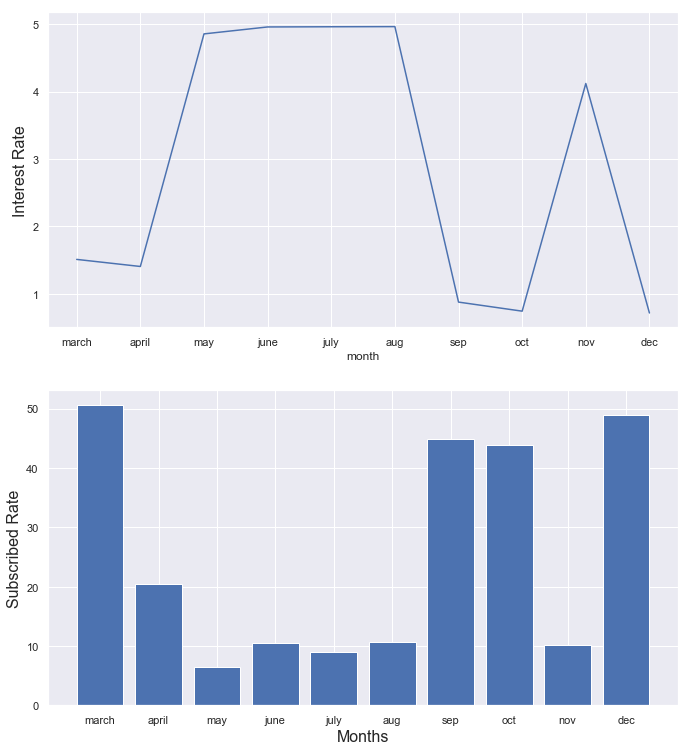

In [51]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,2)
plt.bar(percentage_date.index, percentage_date.values)
plt.ylabel('Subscribed Rate', fontsize=16)
plt.xticks(bank_date.index, months_s)
plt.xlabel('Months', fontsize=16)

plt.subplot(2,1,1)
bank_date['euribor3m'].plot()
plt.xticks(bank_date.index, months_s)
plt.ylabel('Interest Rate', fontsize=16)

plt.subplots_adjust(top=1.5, right=1)
plt.show()

##### Number Employed - Best & Worst Months
- By looking at the two graphs below, we can see that there is a correlation between low number of employed and subscribed rate.
    - The months with the lowest number of employed had the highest subscribed rate.


- Interesting months:
    - March and April had a relatively high number of employed but had a subscribed rate higher than the 'worst' months.

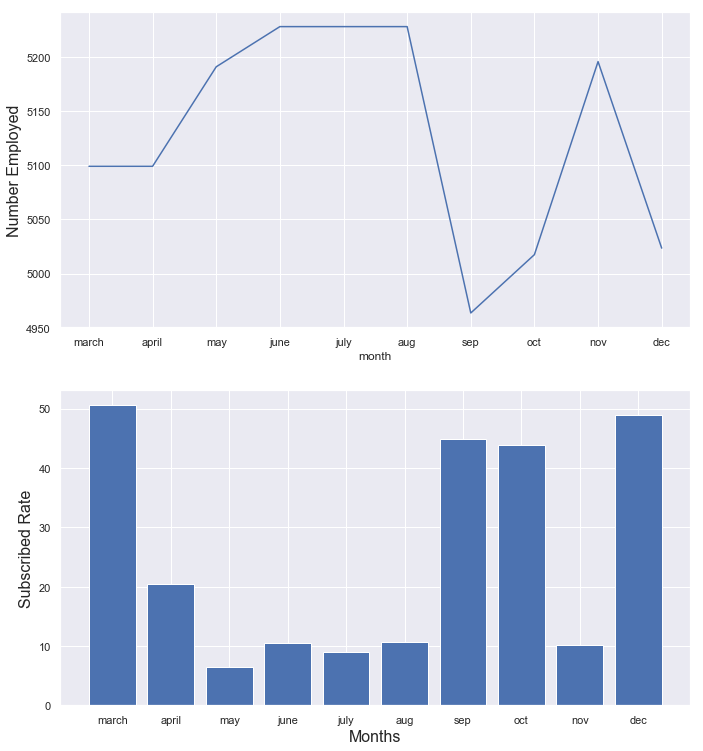

In [52]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,2)
plt.bar(percentage_date.index, percentage_date.values)
plt.ylabel('Subscribed Rate', fontsize=16)
plt.xticks(bank_date.index, months_s)
plt.xlabel('Months', fontsize=16)

plt.subplot(2,1,1)
bank_date['nr.employed'].plot()
plt.xticks(bank_date.index, months_s)
plt.ylabel('Number Employed', fontsize=16)

plt.subplots_adjust(top=1.5, right=1)
plt.show()

# Machine Learning

#### The project will focus on specific metrics to estimate model accuracy rather than just accuracy score. Since the target variable is imbalanced, an accuracy score of 90% would be basically the same as a random guess. In addition, the most important thing for the bank is to make sure to predict the most subscribers as most possible, even if it comes at a cost of increased false positives. Therefore, the metrics we will focus on are the non-subscriber precision rate, subscribed recall rate and AUC.

In [277]:
print("Total Percentage Subscribers {}".format( len(bank[bank['y'] == 1]) /  len(bank)))
print("Total Percentage Not Subscribers {}".format( len(bank[bank['y'] == 0]) / len(bank)))

Total Percentage Subscribers 0.11265417111780131
Total Percentage Not Subscribers 0.8873458288821987


- We will start the machine learning part by selecting the variables that seems to have the highest correlation with increasing the subscription rate, transform the target variable into a boolean (0,1), false and positive, and assign all our feature variables to 'X' and the target variable to 'Y.'

In [272]:
cat_chosen = ['job', 'contact', 'education', 'month', 'duration', 'campaign', 'pdays', 'poutcome', 'euribor3m', 'nr.employed']

# Making y a unit dtype

bank['y'] = bank['y'].replace('no', 0)
bank['y'] = bank['y'].replace('yes', 1)
bank['y'] = bank['y'].astype('uint8')


# Assign X to feature variables and Y to the target variable.
ml_bank = bank[cat_chosen]

X = pd.get_dummies(ml_bank)
y = bank['y']

- Now that we have selected our feature variables and target variables, we will run the prediction models. The project will run 3 different models to see which one performs the best in our data. The models are Logistic Regression, Random Forest and Gradient Boosting.

### Logistic Regression Model

- First, we will run a Grid Search over C and penalty, to see which C strength and what regularaization (Lasso (l1) or Ridge (l2)) method is the best for our model. Then, we will compute the confusion matrix.

In [249]:
from sklearn.model_selection import GridSearchCV

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
L = ['l1', 'l2']

logreg = LogisticRegression()

param_grid = {'C': Cs, 'penalty':L}

logreg_cv = GridSearchCV(logreg, param_grid ,cv=5)

logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 1, 'penalty': 'l1'}
0.9091255939787035


- Now let's refine the C parameter.

In [250]:
from sklearn.model_selection import RandomizedSearchCV

Cs = np.arange(0.1, 10, 0.1)

logreg = LogisticRegression(penalty= 'l1')

param_grid = {'C': Cs}

logreg_cv = RandomizedSearchCV(logreg, param_grid ,cv=5)

logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 5.0}
0.9091602788664979


In [278]:
model = LogisticRegression(C=5, penalty='l1')
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))

[[10684   284]
 [  821   568]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10968
          1       0.67      0.41      0.51      1389

avg / total       0.90      0.91      0.90     12357



In [279]:
# 1st Step - Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities with predict_proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute and print AUC score with roc_auc_score()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9332132641642498


- By tunning the parameters 'C' and 'penalty', we obtained a high AUC of 93.3%, a non-subscriber precision rate of 93% and only a 41% subscriber recall rate.

In [260]:
from sklearn.model_selection import GridSearchCV

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
L = ['l1', 'l2']

logreg_balanced = LogisticRegression(class_weight = "balanced")

param_grid = {'C': Cs, 'penalty':L}

logreg_cv = GridSearchCV(logreg_balanced, param_grid ,cv=5)

logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)

{'C': 1000, 'penalty': 'l2'}
0.8593527799937567


In [262]:
from sklearn.model_selection import GridSearchCV

Cs = [800, 900, 1000, 1100, 1200]
L = ['l1', 'l2']

logreg_balanced = LogisticRegression(class_weight = "balanced", penalty = 'l2')

param_grid = {'C': Cs}

logreg_cv = GridSearchCV(logreg_balanced, param_grid ,cv=5)

logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)

{'C': 1100}
0.8593874648815512


In [280]:
model = LogisticRegression(C=1100, penalty='l2', class_weight = "balanced")
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))

[[9402 1566]
 [ 154 1235]]
             precision    recall  f1-score   support

          0       0.98      0.86      0.92     10968
          1       0.44      0.89      0.59      1389

avg / total       0.92      0.86      0.88     12357



In [281]:
# 1st Step - Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities with predict_proba
y_pred_prob = model.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9368286642101455


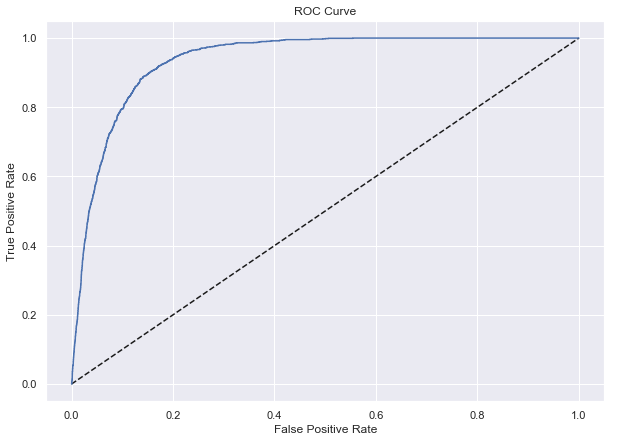

In [282]:
from sklearn.metrics import roc_curve

# 2nd Step - Compute predicted probabilities with predict_proba - It returns the probability of the sample for each class in the model.
y_pred_prob = model.predict_proba(X_test)[:,1]

# 3rd Step - Generate ROC curve values: fpr (False Positive Rate - x-axis), tpr (True Positive Rate - y-axis), thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 4th Step - Plot ROC curve
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

- After balancing the data, the model increased the AUC to 93.6%, non-subscriber precision rate to 98% and subscriber recall rate to 89%.

- This means that with this model we are able to predict with 98% accuracy those who are not going to subscribe, predict 89% of the all the people that are going to subscribe with a 93.6% AUC.

### Random Forest Classification Model

- Now, we are going to compare our logistic regression model with a random forest classification and see which model performs better in our dataset.

- We will start by tuning the parameters: n_estimators, min_samples_split and max_features

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

estimators = [1, 2, 4, 8, 16, 32, 64, 100]
sample_split = np.linspace(0.1, 1, 10, endpoint=True)
features_choice = np.linspace(0.1, 0.5, 10, endpoint=True)

param_grid = {'n_estimators': estimators,
              'min_samples_split' : sample_split,
              'max_features' : features_choice
             }

my_forest = RandomForestClassifier()
my_forest_cv = RandomizedSearchCV(my_forest, param_grid ,cv=5)
my_forest_cv = my_forest_cv.fit(X_train, y_train)

print(my_forest_cv.best_params_)
print(my_forest_cv.best_score_)

{'n_estimators': 2, 'min_samples_split': 0.2, 'max_features': 0.23333333333333334}
0.8967084041483125


In [235]:
rfc_model = RandomForestClassifier(n_estimators=2, min_samples_split=0.2, max_features=0.234)
rfc_model.fit(X_train, y_train)
rfc_model_pred = rfc_model.predict(X_test)

print(confusion_matrix(y_test, rfc_model_pred))
print(classification_report(y_test, rfc_model_pred))

[[10867   101]
 [ 1181   208]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     10968
          1       0.67      0.15      0.24      1389

avg / total       0.88      0.90      0.87     12357



In [248]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities with predict_proba
y_pred_prob = rfc_model.predict_proba(X_test)[:,1]

# Compute and print AUC score with roc_auc_score()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9184873962818204


- The model obtained a high AUC of 91.4%, 90% non-subscriber precision rate, and only 15% subscriber recall rate.

In [230]:
from sklearn.ensemble import RandomForestClassifier

estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
sample_split = np.linspace(0.1, 0.5, 10, endpoint=True)
features_choice = np.linspace(0.1, 0.5, 10, endpoint=True)

param_grid = {'n_estimators': estimators,
              'min_samples_split' : sample_split,
              'max_features' : features_choice
             }

my_forest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
my_forest_cv = RandomizedSearchCV(my_forest, param_grid ,cv=5)
my_forest_cv = my_forest_cv.fit(X_train, y_train)

print(my_forest_cv.best_params_)
print(my_forest_cv.best_score_)

{'n_estimators': 64, 'min_samples_split': 0.1, 'max_features': 0.4111111111111111}
0.8093024869064549


In [284]:
rfc_model = RandomForestClassifier(n_estimators=64, min_samples_split=0.1, max_features=0.41, class_weight='balanced', random_state=51, n_jobs=-1)
rfc_model.fit(X_train, y_train)
rfc_model_pred = rfc_model.predict(X_test)

print(confusion_matrix(y_test, rfc_model_pred))
print(classification_report(y_test, rfc_model_pred))



[[8639 2329]
 [  71 1318]]
             precision    recall  f1-score   support

          0       0.99      0.79      0.88     10968
          1       0.36      0.95      0.52      1389

avg / total       0.92      0.81      0.84     12357



In [286]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities with predict_proba
y_pred_prob = rfc_model.predict_proba(X_test)[:,1]

# Compute and print AUC score with roc_auc_score()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9306493554913856


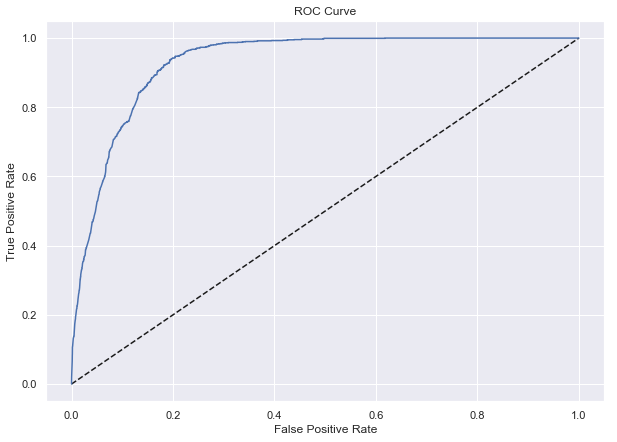

In [267]:
from sklearn.metrics import roc_curve

# 2nd Step - Compute predicted probabilities with predict_proba - It returns the probability of the sample for each class in the model.
y_pred_prob = rfc_model.predict_proba(X_test)[:,1]

# 3rd Step - Generate ROC curve values: fpr (False Positive Rate - x-axis), tpr (True Positive Rate - y-axis), thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 4th Step - Plot ROC curve
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

- After balancing our data, we were able to increase our recall rate to 95%, meaning that now we are able to predict 95% of all the actual subscribers. In addition, the precision rate for non-subscribers is 99%, meaning that when we predict a non-subscriber our model will be correct 99% of the time.
- Comparing to the logistic regression model, we obtained a better non-subscriber precision rate and subscriber recall rate with a slight decrease in AUC. Thus, overall, offering a better model to according to the bank's plan.

### Gradient Boosting Classifier
- For the last part, we will compare the two last models with Gradient Boosting Classifier.


In [174]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier(n_estimators=3000)

learn = np.linspace(0.01,0.1, 5, endpoint=True)
depth = np.arange(2,7)
samples_leaf = [3, 5, 9, 17]
features = ['sqrt', 'log2', None]

param_grid = {'learning_rate':learn,
              'max_depth':depth,
              'min_samples_leaf':samples_leaf,
              'max_features':features
                }

gbc_cv = RandomizedSearchCV(gbc, param_grid, cv=5)
gbc_cv.fit(X_train, y_train)
print(gbc_cv.best_params_)
print(gbc_cv.best_score_)

{'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}
0.9142242724844785


In [175]:
gbc = GradientBoostingClassifier(n_estimators=3000, min_samples_leaf=3, max_features='log2', max_depth=5, learning_rate=0.01)

gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

[[10603   365]
 [  654   735]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95     10968
          1       0.67      0.53      0.59      1389

avg / total       0.91      0.92      0.91     12357



In [246]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities with predict_proba
y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score with roc_auc_score()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9499888805394474


- So far, this model obtained the highest AUC, 95%, and obtained a high non-subscriber precision rate of 94%. However, the subscriber recall rate was only 53%.

In [169]:
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(n_estimators=3000))

param_grid = {'gradientboostingclassifier__learning_rate':learn,
              'gradientboostingclassifier__max_depth':depth,
              'gradientboostingclassifier__min_samples_leaf':samples_leaf,
              'gradientboostingclassifier__max_features':features
                }

gbc_smote = RandomizedSearchCV(smote_pipeline, param_grid, cv=5)
gbc_smote.fit(X_train, y_train)
print(gbc_smote.best_params_)
print(gbc_smote.best_score_)

{'gradientboostingclassifier__min_samples_leaf': 5, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__learning_rate': 0.1}
0.9093337033054698


In [171]:
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(n_estimators=3000, min_samples_leaf=5, max_features='sqrt', max_depth=6, learning_rate=0.1))

smote_pipeline.fit(X_train, y_train)
smote_pipeline_pred = smote_pipeline.predict(X_test)

print(confusion_matrix(y_test, smote_pipeline_pred))
print(classification_report(y_test, smote_pipeline_pred))

[[10475   493]
 [  617   772]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     10968
          1       0.61      0.56      0.58      1389

avg / total       0.91      0.91      0.91     12357



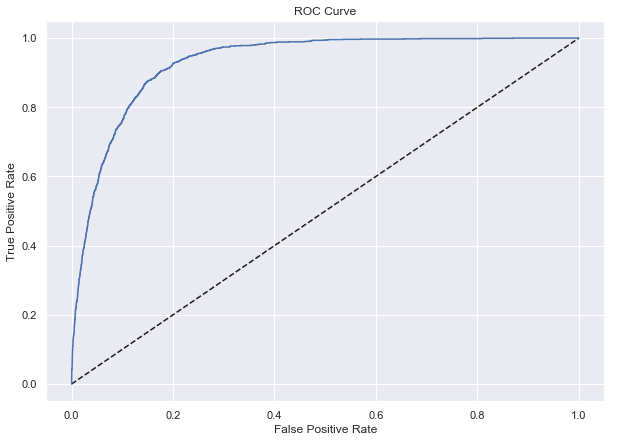

In [239]:
from sklearn.metrics import roc_curve

# 2nd Step - Compute predicted probabilities with predict_proba - It returns the probability of the sample for each class in the model.
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# 3rd Step - Generate ROC curve values: fpr (False Positive Rate - x-axis), tpr (True Positive Rate - y-axis), thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 4th Step - Plot ROC curve
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [271]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Compute and print AUC score with roc_auc_score()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9306923498636521


- After balancing the data, the AUC rate decrease to 93% from 95%, the same rate in non-subscriber precision rate of 94 and only small increase in subscriber recall rate to 56% from 53%.

## Conclusion

- The best model for this dataset is the Random Forest Classification. The model has an accuracy of 99% when it predicts someone is not going to subscribe and predicts 95% of all the subscribers. By applying this model to the next campagin, the bank will increase efficiency, effectivity and increse the amount of subscribers. The bank will increase efficiency and effectivity as it will need to contact only 30% the entire list to obtain the same amount of subscribers, freeing 2068.5 hours from the agents to be allocated somewhere else, and the bank will be directly saving 28,339 Euros with this type of campaign. In addition, the bank can increase the amount of subscribers by creating a more enticing marketing campaign to those who are less likely to not subscribe.

In [311]:
# Average spend p/ call (in seconds)
duration = np.mean(bank['duration'])

# Total amount of people contacted
total_list = len(bank)

# Total time spent contacting people in hours
total_time_hours = total_list * duration / 3600

# Total time needed to contact people to obtain the same amount of subscribers with our model
total_time_campaign = total_time_hours *0.3

# Total amount of money saved (Average salary p/ hour in Portugal - 13,7 Euros)
amount_saved = (total_time_hours - total_time_campaign) * 13.7



print("Total time spent in contacting people (in hours) - {}".format(total_time_hours))
print("Total time needed to spend in new campaign to obtain the same amount of subscribers (in hours) - {}".format(total_time_campaign))
print("Total time saved - {}".format(total_time_hours - total_time_campaign))
print("Total amount saved - {} Euros".format(round(amount_saved)))


Total time spent in contacting people (in hours) - 2955.0675
Total time needed to spend in new campaign to obtain the same amount of subscribers (in hours) - 886.52025
Total time saved - 2068.54725
Total amount saved - 28339 Euros
